In [17]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [20]:
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2

1/1 [==============================] - 0s 59ms/step


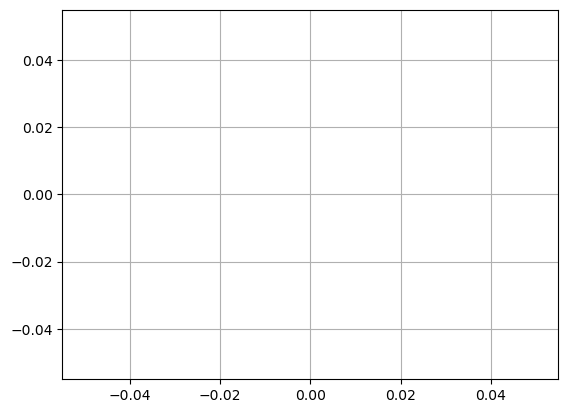

In [23]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

print(X_train2.shape)
X_test2.shape

(11610, 8)


(5160, 8)

In [25]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train2.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train2, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test2, y_test)
X_new = X_test2[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.5892 - val_loss: 706942.3750
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8417 - val_loss: 336570.7812
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6861 - val_loss: 214893.5156
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6400 - val_loss: 193346.8125
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6098 - val_loss: 168597.7812
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5832 - val_loss: 153492.1094
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5621 - val_loss: 133431.2500
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5430 - val_loss: 135546.2500
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5236 - val_loss: 121675.9297
Epoch 10/20
363/363 [==============================] - 

1/1 [==============================] - 0s 52ms/step


# Dane zawsze muszą być przeskalowane